# Kmeans_Images_segmentation_sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img=cv2.imread('./Dataset/tom.jpeg')

In [3]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

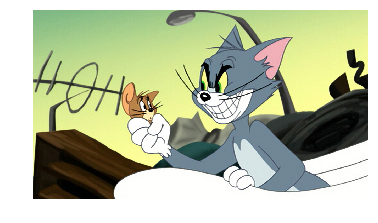

In [20]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
img.shape

(720, 1280, 3)

In [6]:
X=img.reshape((-1,3))

In [7]:
X.shape

(921600, 3)

In [8]:
from sklearn.cluster import KMeans

In [9]:
km=KMeans(n_clusters=10)

In [10]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
centers=km.cluster_centers_

In [12]:
print(centers)

[[200.61560773 223.55982903 142.99276398]
 [ 50.37664662  42.58332466  26.35750109]
 [112.22565597 133.41282902 148.43618445]
 [253.81277752 253.94387093 252.13516503]
 [ 15.11950024  13.33378864   7.99005   ]
 [158.13564439 197.64983294 136.98788783]
 [236.09957865 245.3376166  150.2742452 ]
 [134.59389943 129.49185861 101.77829171]
 [ 76.48572295  86.05756315  81.33883617]
 [220.55619575 208.51563903 211.63237055]]


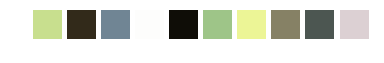

In [13]:
colors=[]
for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    colors.append(color)
    square = np.zeros((100,100,3),dtype='uint8')
    square[:,:,:] = color
    plt.imshow(square)
    plt.axis("off")
    
plt.show()

In [14]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([163044,  96093,  97106, 124766,  79799,  83637, 172345,  31932,
         46150,  26728]))

In [15]:
labels=km.labels_

In [16]:
labels

array([5, 5, 5, ..., 3, 3, 3], dtype=int32)

In [17]:
new_img=np.zeros(X.shape)
for ix in range(X.shape[0]):
    new_img[ix] =colors[labels[ix]]
print(new_img.shape)

(921600, 3)


In [18]:
new_img = new_img.reshape(img.shape)

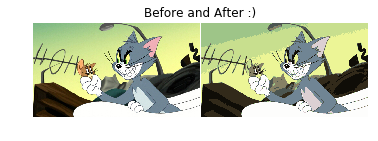

In [19]:
new_img = new_img/255
plt.imshow(np.hstack((img/255,np.ones((720,10,3)),new_img)))
plt.axis("off")
plt.title("Before and After :)")
plt.show()